In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
    # per desfer la opció: https://towardsdatascience.com/how-to-show-all-columns-rows-of-a-pandas-dataframe-c49d4507fcf

In [3]:
roundc3b=pd.read_csv("round_CCCB.csv")
sessionc3b=pd.read_csv("session_CCCB.csv")
userc3b=pd.read_csv("user_CCCB.csv",encoding='latin-1')
userroundc3b=pd.read_csv("userround_CCCB.csv")
roundctd=pd.read_csv("round_ciutadella.csv")
sessionctd=pd.read_csv("session_ciutadella.csv")
userctd=pd.read_csv("user_ciutadella.csv",encoding='latin-1')
userroundctd=pd.read_csv("userround_ciutadella.csv")
display(sessionc3b)

,id,wealth,goal_reached,total_pot
0,1,UNEQUAL-H,1,134
1,2,UNEQUAL-H,1,134
2,3,UNEQUAL-H,1,158
3,4,UNEQUAL-L,1,132
4,5,UNEQUAL-L,1,132
5,6,UNEQUAL-L,1,130
6,7,EQUAL,1,126
7,8,UNEQUAL-L,1,128
8,9,EQUAL,1,120
9,10,UNEQUAL-H,1,136


In [4]:
placevect=["c3b","ctd"]
placename=["CCCB","Ciutadella"]

In [17]:
# number of games with equality and inequality
ineqh=0
ineql=0
for k in range(len(sessionctd)):
    if (sessionctd.loc[k,"wealth"]=="UNEQUAL-H"):
        ineqh+=1
    if (sessionctd.loc[k,"wealth"]=="UNEQUAL-L"):
        ineql+=1
print(ineqh,ineql,len(sessionctd)-ineqh-ineql)

27 22 3


In [41]:
# no es poden fer perquè no hi ha registre del temps:
    # mean time for each round with violinplot
    # correlation between time and round with threshold achieved
    # mean time depending on gender
    # mean time depending on contribution

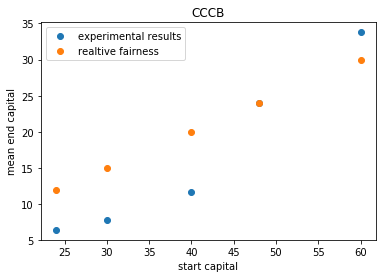

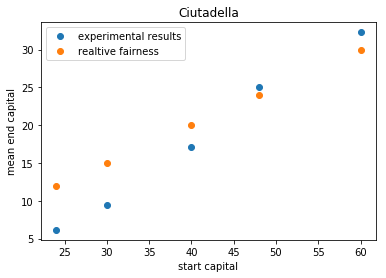

In [26]:
# mean end capital as a function of start capital
for p in range(2):
    exec("userdf=user"+placevect[p])
    scvector=[24,30,40,48,60]
    sumvector=[0.0,0.0,0.0,0.0,0.0]
    counter=[0,0,0,0,0]
    for i in range(len(userdf)):
        for k in range(5):
            if (userdf.loc[i,"endowment_initial"]==scvector[k]):
                sumvector[k]+=userdf.loc[i,"winnings"]
                counter[k]+=1
    for k in range(5):
        sumvector[k]=sumvector[k]/float(counter[k])
    plt.plot(scvector,sumvector,"o",label="experimental results")
    fairvector=list(range(5))
    for i in range(5):
        fairvector[i]=0.5*scvector[i]
    plt.plot(scvector,fairvector,"o",label="realtive fairness")
    plt.xlabel("start capital")
    plt.ylabel("mean end capital")
    plt.title(placename[p])
    plt.legend()
    plt.show()

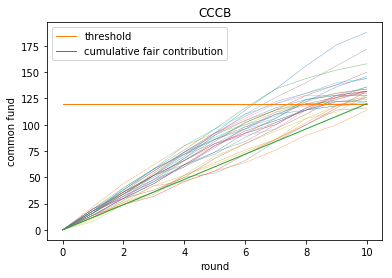

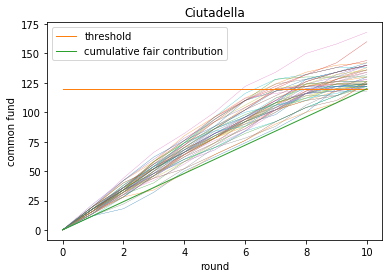

In [31]:
# evolution of funds through the rounds
for p in range(2):
    exec("userdf=user"+placevect[p])
    exec("sessiondf=session"+placevect[p])
    exec("rounddf=round"+placevect[p])
    roundi=list(range(0,11))
    roundlist=(0,1,2,3,4,5,6,7,8,9,10)
    for i in range(1,len(sessiondf)):
        roundi=rounddf.loc[rounddf["session_id"]==i]
        roundi=roundi[["end_pot"]]
        roundi.index=roundi.index%10
        roundi.loc[-1] = [120]
        roundi.index = roundi.index + 1
        roundi.sort_index(inplace=True)
        for j in range (0,11):
            roundi.loc[j]=120-roundi.loc[j]
        plt.plot(roundlist,roundi,lw=0.3)
    plt.plot(roundlist,(120,120,120,120,120,120,120,120,120,120,120),lw=1,label="threshold")
    plt.plot(roundlist,(0,12,24,36,48,60,72,84,96,108,120),lw=1,label="cumulative fair contribution")
    plt.xlabel("round")
    plt.ylabel("common fund")
    plt.title(placename[p])
    plt.legend()
    plt.show()

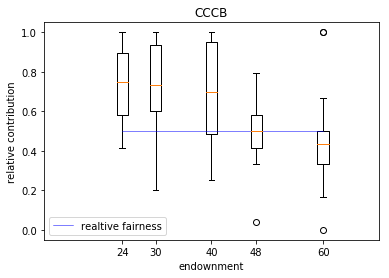

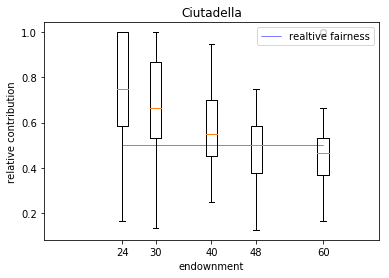

In [34]:
# relative contributions as a function of start capital with boxplot
for p in range(2):
    exec("userdf=user"+placevect[p])
    scvect=[24,30,40,48,60]
    data=[[],[],[],[],[]]
    for k in range(5):
        for i in range(len(userdf)):
            if (userdf.loc[i,"endowment_initial"]==scvect[k]):
                data[k].append(1-userdf.loc[i,"winnings"]/scvect[k])
    plt.boxplot(data,positions=scvect,widths=2)
    fairvector=(0.5,0.5,0.5,0.5,0.5)
    plt.plot(scvect,fairvector,"b-",lw=0.5,label="realtive fairness")
    plt.xlabel("endownment")
    plt.ylabel("relative contribution")
    plt.title(placename[p])
    plt.xlim([10.0,70.0])
    plt.legend()
    plt.show()

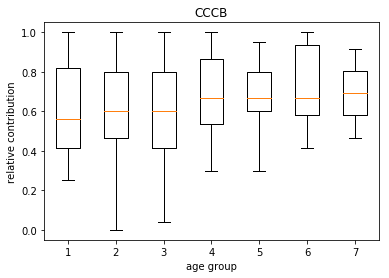

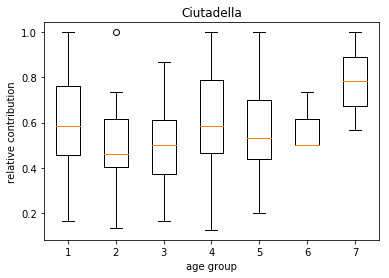

In [50]:
# relative contribution dependence on age
for p in range(2):
    exec("userdf=user"+placevect[p])
    data=[[],[],[],[],[],[],[]]
    for k in range(7):
        for i in range(len(userdf)):
            if (int(userdf.loc[i,"age_range"][1:])==(k+1)):
                data[k].append(1-userdf.loc[i,"winnings"]/userdf.loc[i,"endowment_initial"])
    plt.boxplot(data,positions=[1,2,3,4,5,6,7])
    plt.xlabel("age group")
    plt.ylabel("relative contribution")
    plt.title(placename[p])
    plt.show()

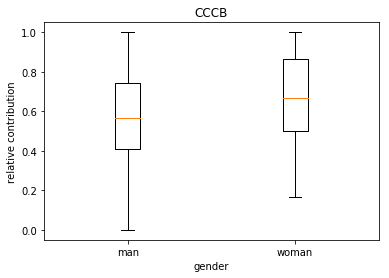

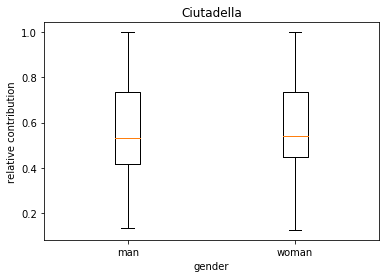

In [51]:
# relative contribution dependence on gender
for p in range(2):
    exec("userdf=user"+placevect[p])
    data=[[],[]]
    for i in range(len(userdf)):
        if (userdf.loc[i,"gender"]=="M"):
            data[0].append(1-userdf.loc[i,"winnings"]/userdf.loc[i,"endowment_initial"])
        if (userdf.loc[i,"gender"]=="F"):
            data[1].append(1-userdf.loc[i,"winnings"]/userdf.loc[i,"endowment_initial"])
    plt.boxplot(data,positions=[0,1])
    plt.xticks([0,1],["man","woman"])
    plt.xlabel("gender")
    plt.ylabel("relative contribution")
    plt.title(placename[p])
    plt.show()

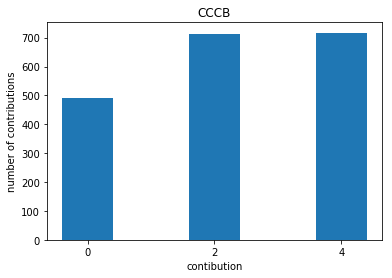

0.2552083333333333 0.37135416666666665 0.3734375


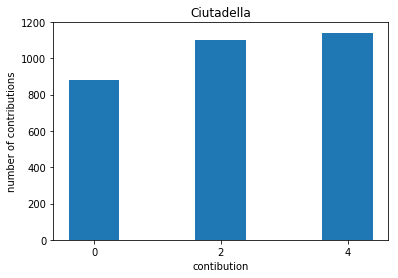

0.28173076923076923 0.3525641025641026 0.3657051282051282


In [8]:
# number of contribution of each value
for p in range(2):
    exec("userdf=user"+placevect[p])
    exec("userrounddf=userround"+placevect[p])
    count=[0,0,0]
    for i in range(len(userrounddf)):
        for n in range(3):
            if (userrounddf.loc[i,"option_selected"]==2*n):
                count[n]+=1
    plt.bar([0,2,4],count)
    plt.xticks([0,2,4],[0,2,4])
    plt.xlabel("contibution")
    plt.ylabel("number of contributions")
    plt.title(placename[p])
    plt.show()
    print(count[0]/len(userrounddf),count[1]/len(userrounddf),count[2]/len(userrounddf))

In [19]:
# Gini coefficient
def gini(dataset):
    sum1=0.0
    sum2=0.0
    n=len(dataset)
    for i in range(n):
        sum1+=dataset[i]
        for j in range(n):
            sum2+=abs(dataset[i]-dataset[j])
    gini=sum2/(2*n*sum1)
    return gini
for p in range(2):
    exec("userdf=user"+placevect[p])
    exec("sessiondf=session"+placevect[p])
    incomein_e=[]
    incomein_h=[]
    incomein_l=[]
    income_e=[]
    income_h=[]
    income_l=[]
    for k in range(len(userdf)):
        if (math.isnan(float(userdf.loc[k,"session_id"]))==False):
            if(sessiondf.loc[int(userdf.loc[k,"session_id"])-1,"wealth"]=="EQUAL"):
                incomein_e.append(userdf.loc[k,"endowment_initial"])
                income_e.append(userdf.loc[k,"winnings"])
            elif (sessiondf.loc[int(userdf.loc[k,"session_id"])-1,"wealth"]=="UNEQUAL-H"):
                incomein_h.append(userdf.loc[k,"endowment_initial"])
                income_h.append(userdf.loc[k,"winnings"])
            elif (sessiondf.loc[int(userdf.loc[k,"session_id"])-1,"wealth"]=="UNEQUAL-L"):
                incomein_l.append(userdf.loc[k,"endowment_initial"])
                income_l.append(userdf.loc[k,"winnings"])
    inigini_e=gini(incomein_e)
    inigini_h=gini(incomein_h)
    inigini_l=gini(incomein_l)
    gini_e=gini(income_e)
    gini_h=gini(income_h)
    gini_l=gini(income_l)
    print("Equal, "+placename[p]+": Initial Gini=",inigini_e,", Final Gini=",gini_e,", \u0394Gini=", gini_e-inigini_e)
    print("Unequal-H, "+placename[p]+": Initial Gini=",inigini_h,", Final Gini=",gini_h,", \u0394Gini=", gini_h-inigini_h)
    print("Unequal-L, "+placename[p]+": Initial Gini=",inigini_l,", Final Gini=",gini_l,", \u0394Gini=", gini_l-inigini_l)

Equal, CCCB: Initial Gini= 0.0 , Final Gini= 0.47348816827344437 , ΔGini= 0.47348816827344437
Unequal-H, CCCB: Initial Gini= 0.16514558887440242 , Final Gini= 0.49732008163989705 , ΔGini= 0.3321744927654946
Unequal-L, CCCB: Initial Gini= 0.13333333333333333 , Final Gini= 0.3182727159105112 , ΔGini= 0.18493938257717787
Equal, Ciutadella: Initial Gini= 0.0 , Final Gini= 0.23932312651087834 , ΔGini= 0.23932312651087834
Unequal-H, Ciutadella: Initial Gini= 0.1669218546872743 , Final Gini= 0.43927771947445937 , ΔGini= 0.2723558647871851
Unequal-L, Ciutadella: Initial Gini= 0.1304163726182075 , Final Gini= 0.31744338386674154 , ΔGini= 0.18702701124853405


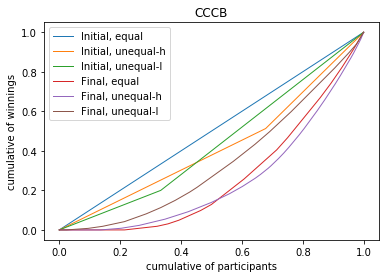

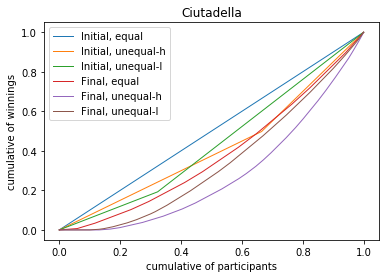

In [9]:
# Lorenz curve
def lorenz(dataset,Label):
    cumulative=[0]
    xaxis=[0]
    for i in range(len(dataset)):
        cumulative.append(cumulative[i]+dataset[i])
        xaxis.append((i+1)/len(dataset))
    for i in range(len(dataset)+1):
        cumulative[i]=cumulative[i]/max(cumulative)
    plt.plot(xaxis,cumulative,lw=1,label=Label)
    return
for p in range(2):
    exec("userdf=user"+placevect[p])
    exec("sessiondf=session"+placevect[p])
    incomein_e=[]
    incomein_h=[]
    incomein_l=[]
    income_e=[]
    income_h=[]
    income_l=[]
    for k in range(len(userdf)):
        if (math.isnan(float(userdf.loc[k,"session_id"]))==False):
            if(sessiondf.loc[int(userdf.loc[k,"session_id"])-1,"wealth"]=="EQUAL"):
                incomein_e.append(userdf.loc[k,"endowment_initial"])
                income_e.append(userdf.loc[k,"winnings"])
            elif (sessiondf.loc[int(userdf.loc[k,"session_id"])-1,"wealth"]=="UNEQUAL-H"):
                incomein_h.append(userdf.loc[k,"endowment_initial"])
                income_h.append(userdf.loc[k,"winnings"])
            elif (sessiondf.loc[int(userdf.loc[k,"session_id"])-1,"wealth"]=="UNEQUAL-L"):
                incomein_l.append(userdf.loc[k,"endowment_initial"])
                income_l.append(userdf.loc[k,"winnings"])
    incomein_e.sort()
    incomein_h.sort()
    incomein_l.sort()
    income_e.sort()
    income_h.sort()
    income_l.sort()
    lorenz(incomein_e,"Initial, equal")
    lorenz(incomein_h,"Initial, unequal-h")
    lorenz(incomein_l,"Initial, unequal-l")
    lorenz(income_e,"Final, equal")
    lorenz(income_h,"Final, unequal-h")
    lorenz(income_l,"Final, unequal-l")
    plt.xlabel("cumulative of participants")
    plt.ylabel("cumulative of winnings")
    plt.title(placename[p])
    plt.legend()
    plt.show()

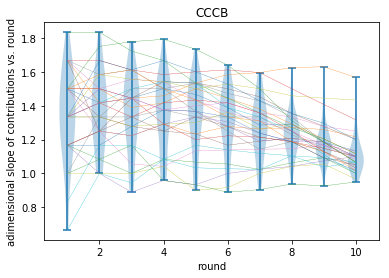

0.6666666666666666 1.8333333333333333


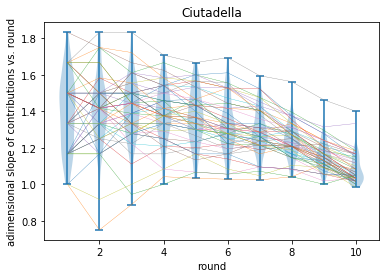

0.75 1.8333333333333333


In [60]:
for p in range(2):
    exec("rounddf=round"+placevect[p])
    hurry=[[] for i in range(10)]
    for n in range(len(rounddf)):
        hurry[rounddf.loc[n,"num_round"]-1].append(10*(120-rounddf.loc[n,"end_pot"])/(120*rounddf.loc[n,"num_round"]))
    plt.violinplot(hurry)
    for n in range(len(rounddf)):
        if (rounddf.loc[n,"num_round"]==1):
            rlzn=[]
        rlzn.append(10*(120-rounddf.loc[n,"end_pot"])/(120*rounddf.loc[n,"num_round"]))
        if (rounddf.loc[n,"num_round"]==10):
            plt.plot([(i+1) for i in range(10)],rlzn,lw=0.3)
    plt.xlabel("round")
    plt.ylabel("adimensional slope of contributions vs. round")
    plt.title(placename[p])
    plt.show()
    print(np.min(hurry),np.max(hurry))

In [23]:
for p in range(2):
    exec("sessiondf=session"+placevect[p])
    fails=0
    for k in range(len(sessiondf)):
        if(sessiondf.loc[k,"goal_reached"]==0):
            fails+=1
    print("Games failed ("+placename[p]+"):",fails)

Games failed (CCCB): 2
Games failed (Ciutadella): 1
